# Introdução

Este projeto visa estudar as movimentações pix por município, com foco no estado do Rio Grande do Sul.<br>
Os dados foram obtidos diretamente do Banco Central e [podem ser acessados clicando aqui](https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/aplicacao#!/recursos/TransacoesPixPorMunicipio#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwLCJEYXRhQmFzZSI6IjIwMjAxMSJ9LCJwcm9wcmllZGFkZXMiOlswLDEsMiwzLDQsNSw2LDcsOCw5LDEwLDExLDEyLDEzLDE0XSwicGVzcXVpc2FkbyI6dHJ1ZSwiYWN0aXZlVGFiIjoidGFibGUiLCJncmlkU3RhdGUiOnsDMAM6W3sDQgMiBDAEIiwDQQN9LHsDQgMiBDYEIiwDQQN9LHsDQgMiBDcEIiwDQQN9LHsDQgMiBDgEIiwDQQN9LHsDQgMiBDEzBCIsA0EDfSx7A0IDIgQxNAQiLANBA31dLAMxAzp7fSwDMgM6W10sAzMDOnt9LAM0Azp7fSwDNQM6e319LCJwaXZvdE9wdGlvbnMiOnsDYQM6e30sA2IDOltdLANjAzo1MDAsA2QDOltdLANlAzpbXSwDZgM6W10sA2cDOiJrZXlfYV90b196IiwDaAM6ImtleV9hX3RvX3oiLANpAzp7fSwDagM6e30sA2sDOjg1LANsAzpmYWxzZSwDbQM6e30sA24DOnt9LANvAzoiQ29udGFnZW0iLANwAzoiVGFibGUifX0=).

Para tal serão construídos modelos de Regressão Linear que serão avaliados a partir de algumas estatísticas.<br>
Para finalizar, será disponibilizado um simulador para aplicação de um dos modelos construídos.

O simulador, em especial, foi pensado para ser usado por colegas fora da área de dados que possam se beneficiar com os modelos.

# Objetivos

Com esse estudo, deseja-se:
- Compreender o conjunto de dados e o comportamento das variáveis.
- Construir um modelo de regressão linear que determine a quantidade de movimentações pix nas cidades gaúchas, indicando a data e o montante movimentado esperado.
- Construir um segundo modelo de regressão linear que determine a o valor total movimentado via pix nas cidades gaúchas, indicando a data e a quantidade de transações.
- Construir simulador para as previsões de um dos modelos.

# 0. Preparações

Importando bibliotecas

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importando o dataset

In [2]:
dados = pd.read_json('dados_pix.json')

In [3]:
dados = pd.json_normalize(dados['value'])

Sobre o dataset:

Transações Pix liquidadas por município e por pessoas físicas (PF) e jurídicas (PJ).

| Nome | Tipo | Título | Descrição | 
| --- | --- | ---| ---| 
| AnoMes | inteiro | Data-base | Data-base no formato AAAAMM | 
| Municipio_Ibge | inteiro | Código Município | Código IBGE do município | 
| Municipio | texto | Município | Nome do município | 
| Estado_Ibge | inteiro | Código Estado | Código IBGE do estado | 
| Estado | texto | Estado | Nome do Estado | 
| Sigla_Regiao | texto | Sigla Região | Sigla da Região | 
| Regiao | texto | Região | Região do país (Norte, Nordeste, Sul, Sudeste e Centro-Oeste). | 
| VL_PagadorPF | decimal | Valor Pagador PF | Volume financeiro em R$ das transações cujo Pagador é uma pessoa física (PF). | 
| QT_PagadorPF | decimal | Quantidade Pagador PF | Quantidade de transações cujo Pagador é uma pessoa física (PF). | 
| VL_PagadorPJ | decimal | Valor Pagador PJ | Volume financeiro em R$ das transações cujo Pagador é uma pessoa jurídica (PJ). | 
| QT_PagadorPJ | decimal | Quantidade Pagador PJ | Quantidade de transações cujo Pagador é uma pessoa jurídica (PJ). | 
| VL_RecebedorPF | decimal | Valor Recebedor PF | Volume financeiro em R$ das transações cujo Recebedor é uma pessoa física (PF). | 
| QT_RecebedorPF | decimal | Quantidade Recebedor PF | Quantidade de transações cujo Recebedor é uma pessoa física (PF). | 
| VL_RecebedorPJ | decimal | Valor Recebedor PJ | Volume financeiro em R$ das transações cujo Recebedor é uma pessoa jurídica (PJ). | 
| QT_RecebedorPJ | decimal | Quantidade Recebedor PJ | Quantidade de transações cujo Recebedor é uma pessoa jurídica (PJ). | 

As informações acima podem ser lidas na documentação [disponibilizada pelo Banco Central](https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/documentacao).

# 1. Análise exploratória dos dados

In [4]:
# Visão geral do DataFrame

dados.head()

,AnoMes,Municipio_Ibge,Municipio,Estado_Ibge,Estado,Sigla_Regiao,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
0,202011,2106375.00,MARANHÃOZINHO,21.00,MARANHÃO,NE,NORDESTE,61883.59,285,0.00,0,84159.92,273,0.00,0
1,202109,5201207.00,ANHANGUERA,52.00,GOIÁS,CO,CENTRO-OESTE,600338.92,1918,26647.53,88,521888.81,1909,206991.26,185
2,202107,2600401.00,ÁGUA PRETA,26.00,PERNAMBUCO,NE,NORDESTE,7825613.20,36595,856012.47,931,8808647.66,43938,864315.85,1120
3,202304,5218706.00,RIANÁPOLIS,52.00,GOIÁS,CO,CENTRO-OESTE,12853024.88,40574,5380091.86,3405,13148730.68,34619,7569541.56,6478
4,202310,3508207.00,BURITIZAL,35.00,SÃO PAULO,SE,SUDESTE,9896967.20,42862,7491146.26,4910,11151533.05,26293,9226711.20,8950


In [5]:
# Informações de tipagem e preenchimento das colunas

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233898 entries, 0 to 233897
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AnoMes          233898 non-null  int64  
 1   Municipio_Ibge  233856 non-null  float64
 2   Municipio       233898 non-null  object 
 3   Estado_Ibge     233856 non-null  float64
 4   Estado          233898 non-null  object 
 5   Sigla_Regiao    233856 non-null  object 
 6   Regiao          233898 non-null  object 
 7   VL_PagadorPF    233898 non-null  float64
 8   QT_PagadorPF    233898 non-null  int64  
 9   VL_PagadorPJ    233898 non-null  float64
 10  QT_PagadorPJ    233898 non-null  int64  
 11  VL_RecebedorPF  233898 non-null  float64
 12  QT_RecebedorPF  233898 non-null  int64  
 13  VL_RecebedorPJ  233898 non-null  float64
 14  QT_RecebedorPJ  233898 non-null  int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 26.8+ MB


In [6]:
# Confirmação da quantidade de 'na' nas colunas

dados.isna().sum()

AnoMes             0
Municipio_Ibge    42
Municipio          0
Estado_Ibge       42
Estado             0
Sigla_Regiao      42
Regiao             0
VL_PagadorPF       0
QT_PagadorPF       0
VL_PagadorPJ       0
QT_PagadorPJ       0
VL_RecebedorPF     0
QT_RecebedorPF     0
VL_RecebedorPJ     0
QT_RecebedorPJ     0
dtype: int64

Ao observar de forma geral os dados, percebe-se que:
- As colunas estão com tipagem e formtação adequdas aos dados;
- Considerando o objetivo do projeto, algumas colunas poderão ser retiradas: Municipio_Ibge, Estado_Ibge, Sigla_Regiao, Regiao;
- Há dados 'na', mas em número ínfimo comparado ao total de dados no dataset e em colunas que serão retiradas.

### 1.1. Tratamentos iniciais

In [7]:
# Selecionando apenas os dados do estado RIO GRANDE DO SUL
# Retirando as colunas não relacionadas ao estudo pretendido
# A coluna Estado também foi retirada visto que todos os dados analisados são do mesmo estado

dados_rs = dados.loc[dados['Estado'] == 'RIO GRANDE DO SUL']
dados_rs = dados_rs.drop(['Municipio_Ibge', 'Estado_Ibge', 'Estado', 'Sigla_Regiao', 'Regiao', 'VL_RecebedorPF', 'QT_RecebedorPF', 'VL_RecebedorPJ', 'QT_RecebedorPJ'], axis = 1)


In [8]:
# Orgnizando o DataFrame

dados_rs.sort_values(by='AnoMes', inplace= True)
dados_rs.reset_index(drop = True, inplace=True)
dados_rs

,AnoMes,Municipio,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ
0,202011,FAZENDA VILANOVA,107782.99,166,9689.20,11
1,202011,SÃO LEOPOLDO,12282396.20,26710,12654608.99,2321
2,202011,POUSO NOVO,14170.66,40,4671.18,9
3,202011,TUPANDI,67648.27,153,6720.41,12
4,202011,CHUÍ,94249.11,230,69583.97,32
...,...,...,...,...,...,...
20869,202404,BALNEÁRIO PINHAL,15280949.16,107704,9089530.55,8759
20870,202404,PARAÍ,9254219.93,30978,37018069.20,6510
20871,202404,CERRO LARGO,19315689.34,74005,19931090.39,7323
20872,202404,MARIANO MORO,3011836.38,7955,335354.25,339


In [9]:
# Adicionando as colunas VL_Total_Pagador (Soma de valores pagos por PF e PJ) e QT_Total_Pagador (Soma da quantidade de transações pix por PF e PJ)
dados_rs['VL_Total_Pagador'] = dados_rs['VL_PagadorPF'] + dados_rs['VL_PagadorPJ']
dados_rs['QT_Total_Pagador'] = dados_rs['QT_PagadorPF'] + dados_rs['QT_PagadorPJ']
dados_rs

,AnoMes,Municipio,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_Total_Pagador,QT_Total_Pagador
0,202011,FAZENDA VILANOVA,107782.99,166,9689.20,11,117472.19,177
1,202011,SÃO LEOPOLDO,12282396.20,26710,12654608.99,2321,24937005.19,29031
2,202011,POUSO NOVO,14170.66,40,4671.18,9,18841.84,49
3,202011,TUPANDI,67648.27,153,6720.41,12,74368.68,165
4,202011,CHUÍ,94249.11,230,69583.97,32,163833.08,262
...,...,...,...,...,...,...,...,...
20869,202404,BALNEÁRIO PINHAL,15280949.16,107704,9089530.55,8759,24370479.71,116463
20870,202404,PARAÍ,9254219.93,30978,37018069.20,6510,46272289.13,37488
20871,202404,CERRO LARGO,19315689.34,74005,19931090.39,7323,39246779.73,81328
20872,202404,MARIANO MORO,3011836.38,7955,335354.25,339,3347190.63,8294


### 1.2. Exploração das variáveis

In [10]:
# Conhecendo as variáveis AnoMes e Municipio

print(f'Valores únicos - AnoMes: {dados_rs.AnoMes.unique().shape[0]}')

print(f'\nValores únicos - Municipio: {dados_rs.Municipio.unique().shape[0]}')


Valores únicos - AnoMes: 42

Valores únicos - Municipio: 497


Considerando o volumoso número de municípios, serão destacados os cinco com maiores e os cinco com menores VL_Total_Pagador e QT_Total_Pagador.

In [11]:
VL_total = pd.DataFrame(dados_rs.groupby('Municipio')[['VL_Total_Pagador']].sum())
VL_total.sort_values('VL_Total_Pagador', ascending = False)

,VL_Total_Pagador
Municipio,
PORTO ALEGRE,412448245850.87
CAXIAS DO SUL,101039332190.13
CANOAS,63574065960.60
PASSO FUNDO,51464784517.76
NOVO HAMBURGO,48027953882.38
...,...
SANTA TEREZA,47340719.92
CORONEL PILAR,42872867.47
CANUDOS DO VALE,39667419.24


In [12]:
QT_total = pd.DataFrame(dados_rs.groupby('Municipio')[['QT_Total_Pagador']].sum())
QT_total.sort_values('QT_Total_Pagador', ascending = False)

,QT_Total_Pagador
Municipio,
PORTO ALEGRE,767328617
CANOAS,159227013
CAXIAS DO SUL,148967302
GRAVATAÍ,117223128
PELOTAS,112384831
...,...
TUPANCI DO SUL,124886
CANUDOS DO VALE,101336
UNIÃO DA SERRA,91690


Ficam nítidos os múnicípios que mais movimentam via pix, tanto em quantidade quanto em valores: Porto Alegre, Canoas e Caxias do Sul.<br>
De forma semelhante, há três municípios que repetem nas análises quanto estarem entre os que menos  movimentam via pix: Coronel Pilar, União da Serra e Canudos do Vale.


Para entender o comportamento das variáveis numéricas, serão gerados gráficos de suas distribuições.

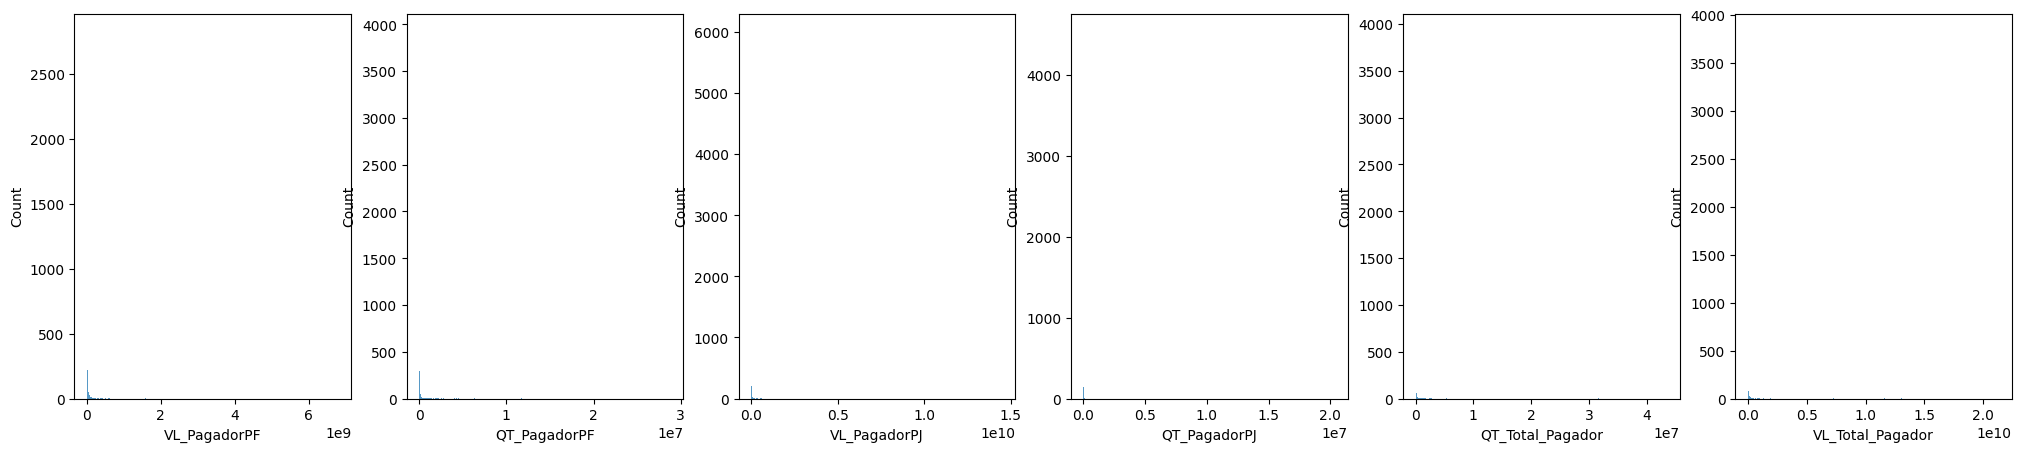

In [13]:
fig, axs = plt.subplots(1, 6, figsize = (25, 5))

colunas = ['VL_PagadorPF', 'QT_PagadorPF', 'VL_PagadorPJ', 'QT_PagadorPJ', 'QT_Total_Pagador', 'VL_Total_Pagador']

for col in colunas:
    sns.histplot(data = dados_rs, x = col, ax = axs[colunas.index(col)])

Observando os gráficos atentamente, percebe-se que todos apresentam assimetria à direita, isto é, há dados que "prolongam' o gráfico à direita

Com o objetivo de melhorar a observação do comportamento dos dados, será feita a Transformação Logarítmica dos dados numéricos, com excessão da variável AnoMes.<br>
Essa transformação não afeta a ordem dos dados, mas aproxima os valores, o que facilita a análise do comportamento das variáveis e seu uso em modelos preditivos.

In [14]:
# Exemplificando a Transformação Logarítmica:

print("Maior valor da variável QT_Total_Pagador:", dados_rs['QT_Total_Pagador'].max(), '\nLog do maior valor =', np.log(dados_rs['QT_Total_Pagador'].max()).round(2))
print("\nMenor valor da variável QT_Total_Pagador:", dados_rs['QT_Total_Pagador'].min(), '\nLog do menor valor =', np.log(dados_rs['QT_Total_Pagador'].min()).round(2))


Maior valor da variável QT_Total_Pagador: 43556096 
Log do maior valor = 17.59

Menor valor da variável QT_Total_Pagador: 4 
Log do menor valor = 1.39


Com o exemplo acima, fica nítida a diferença entre os valores, ou seja, quão próximos ficam os dados após a transformação logarítimica.

Para a transformação, serão criadas novas colunas com o prefixo "log_".

# 2. Preparação do DataFrame para modelo de Regressão Linear

In [15]:
dados_rs['log_VL_PagadorPF'] = np.log(dados_rs['VL_PagadorPF'])
dados_rs['log_QT_PagadorPF'] = np.log(dados_rs['QT_PagadorPF'])
dados_rs['log_VL_PagadorPJ'] = np.log(dados_rs['VL_PagadorPJ']+1) # +1 em função de valores iguais a zero, pois log(0) não existe
dados_rs['log_QT_PagadorPJ'] = np.log(dados_rs['QT_PagadorPJ']+1) # +1 pelo mesmo motivo
dados_rs['log_QT_Total_Pagador'] = np.log(dados_rs['QT_Total_Pagador'])
dados_rs['log_VL_Total_Pagador'] = np.log(dados_rs['VL_Total_Pagador'])

In [16]:
# Observando o DataFrame
dados_rs

,AnoMes,Municipio,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_Total_Pagador,QT_Total_Pagador,log_VL_PagadorPF,log_QT_PagadorPF,log_VL_PagadorPJ,log_QT_PagadorPJ,log_QT_Total_Pagador,log_VL_Total_Pagador
0,202011,FAZENDA VILANOVA,107782.99,166,9689.20,11,117472.19,177,11.59,5.11,9.18,2.48,5.18,11.67
1,202011,SÃO LEOPOLDO,12282396.20,26710,12654608.99,2321,24937005.19,29031,16.32,10.19,16.35,7.75,10.28,17.03
2,202011,POUSO NOVO,14170.66,40,4671.18,9,18841.84,49,9.56,3.69,8.45,2.30,3.89,9.84
3,202011,TUPANDI,67648.27,153,6720.41,12,74368.68,165,11.12,5.03,8.81,2.56,5.11,11.22
4,202011,CHUÍ,94249.11,230,69583.97,32,163833.08,262,11.45,5.44,11.15,3.50,5.57,12.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20869,202404,BALNEÁRIO PINHAL,15280949.16,107704,9089530.55,8759,24370479.71,116463,16.54,11.59,16.02,9.08,11.67,17.01
20870,202404,PARAÍ,9254219.93,30978,37018069.20,6510,46272289.13,37488,16.04,10.34,17.43,8.78,10.53,17.65
20871,202404,CERRO LARGO,19315689.34,74005,19931090.39,7323,39246779.73,81328,16.78,11.21,16.81,8.90,11.31,17.49
20872,202404,MARIANO MORO,3011836.38,7955,335354.25,339,3347190.63,8294,14.92,8.98,12.72,5.83,9.02,15.02


Revisitando o comportamento os gráficos das variáveis após a transformação:

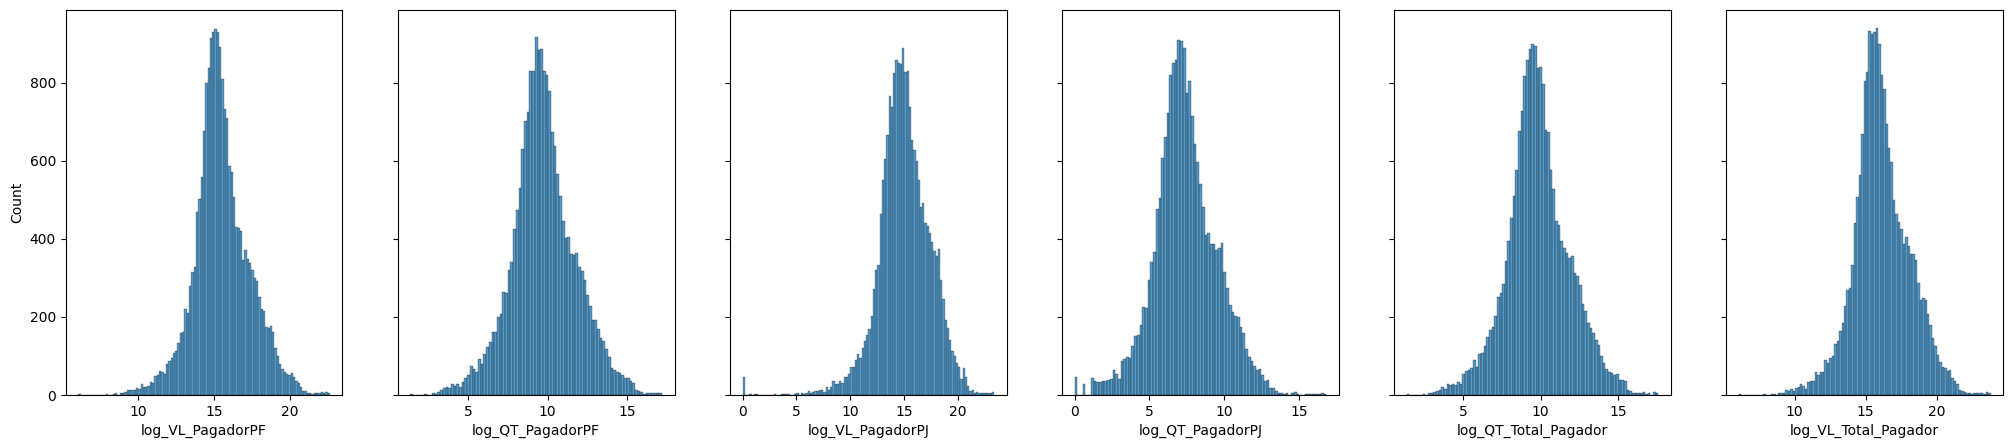

In [17]:
fig, axs = plt.subplots(1, 6, figsize = (25, 5), sharey = True)

colunas = ['log_VL_PagadorPF', 'log_QT_PagadorPF', 'log_VL_PagadorPJ', 'log_QT_PagadorPJ', 'log_QT_Total_Pagador', 'log_VL_Total_Pagador']

for col in colunas:
    sns.histplot(data = dados_rs, x = col, ax = axs[colunas.index(col)])


A transformação logarítmica trouxe as mudanças previstas, tornando os dados mais próximos da curva normal, o que facilitará para a aplicação de técnicas preditivas.

A coluna Municipio apresenta dados textuais, que não são adequados para modelos de Machine Learning.<br>
Portanto, tal coluna será modificada em prol do modelo.

In [18]:
# Transformando os dados de Municipio em Verdadeiro ou Falso, mas usando números inteiros zero e um

dados_rs_municipios = pd.get_dummies(dados_rs['Municipio'], dtype = int)

In [19]:
# Agregando no novo DataFrame as colunas numéricas

dados_rs_municipios[['AnoMes', 'log_QT_Total_Pagador', 'log_VL_Total_Pagador']] = dados_rs[['AnoMes', 'log_QT_Total_Pagador', 'log_VL_Total_Pagador']]

In [20]:
# Observação geral do novo DataFrame

dados_rs_municipios

,ACEGUÁ,AGUDO,AJURICABA,ALECRIM,ALEGRETE,ALEGRIA,ALMIRANTE TAMANDARÉ DO SUL,ALPESTRE,ALTO ALEGRE,ALTO FELIZ,...,VISTA ALEGRE DO PRATA,VISTA GAÚCHA,VITÓRIA DAS MISSÕES,WESTFÁLIA,XANGRI-LÁ,ÁGUA SANTA,ÁUREA,AnoMes,log_QT_Total_Pagador,log_VL_Total_Pagador
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202011,5.18,11.67
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202011,10.28,17.03
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202011,3.89,9.84
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202011,5.11,11.22
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202011,5.57,12.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202404,11.67,17.01
20870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202404,10.53,17.65
20871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202404,11.31,17.49
20872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202404,9.02,15.02


In [21]:
# Confirmando a tipagem dos dados

dados_rs_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20874 entries, 0 to 20873
Columns: 500 entries, ACEGUÁ to log_VL_Total_Pagador
dtypes: float64(2), int32(497), int64(1)
memory usage: 40.1 MB


# 3. Regressão Linear

Importando as bibliotecas necessárias.

In [166]:
#Statsmodels para avaliação dos modelos
import statsmodels.api as sm

#SKLearn para construção dos modelos de Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Serão realizadas duas Regressões Lineares:

RL1 = log_QT_Total_Pagador

RL2 = log_VL_Total_Pagador

### 3.1. RL1 = log_QT_Total_Pagador

Organização dos conjuntos para o modelo:

In [138]:
x = dados_rs_municipios.drop(['log_QT_Total_Pagador'], axis = 1)
y = dados_rs_municipios['log_QT_Total_Pagador']

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### 3.1.1. Usando Statsmodels para avaliar estatísticas do modelo:

In [167]:
x_train_com_constante = sm.add_constant(x_train)
modelo_QT_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst = True).fit()

In [169]:
print(modelo_QT_statsmodels.summary())

                             OLS Regression Results                             
Dep. Variable:     log_QT_Total_Pagador   R-squared:                       0.986
Model:                              OLS   Adj. R-squared:                  0.985
Method:                   Least Squares   F-statistic:                     2239.
Date:                  Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                          19:53:19   Log-Likelihood:                 166.63
No. Observations:                 16699   AIC:                             664.7
Df Residuals:                     16200   BIC:                             4519.
Df Model:                           498                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


Nessa avaliação, serão destacadas duas informações: Prob (F-statistic) e P>|t|.
- Em ambos os casos, foram demonstrados que a probabilidade está positiva para o modelo.
- Ao avaliar o P>|t| relacionados às variáveis, duas saem do esperado: Alvorada e Viamão. Porém, por serem cidades importantes e não haver dados para avaliar se os valores está digitados corretamente, as variáveis serão mantidas.

#### 3.1.2. Gerando o modelo com ScikitLearn

In [140]:
modelo_QT = LinearRegression()

In [141]:
modelo_QT.fit(x_train,y_train)

LinearRegression()

Avaliando o modelo

In [185]:
R2 = modelo_QT.score(x_train, y_train)
R2

0.9856822141230852

In [143]:
y_QT_prev = modelo_QT.predict(x_test)

In [184]:
R2_previsao = metrics.r2_score(y_test, y_QT_prev)
R2_previsao

0.9846528196355113

Ao observar o R² tanto para o conjunto de treino quanto de teste, os valores calculados são positivos para o modelo, visto que quanto mais próximo de 1, melhor.

### 3.2. RL2 = log_VL_Total_Pagador

Organização dos conjuntos para o modelo:

In [186]:
x = dados_rs_municipios.drop(['log_VL_Total_Pagador'], axis = 1)
y = dados_rs_municipios['log_VL_Total_Pagador']

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### 3.2.1. Usando Statsmodels para avaliar estatísticas do modelo:

In [189]:
x_train_com_constante = sm.add_constant(x_train)
modelo_VL_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst = True).fit()

In [192]:
print(modelo_VL_statsmodels.summary())

                             OLS Regression Results                             
Dep. Variable:     log_VL_Total_Pagador   R-squared:                       0.984
Model:                              OLS   Adj. R-squared:                  0.983
Method:                   Least Squares   F-statistic:                     1987.
Date:                  Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                          20:23:08   Log-Likelihood:                -421.48
No. Observations:                 16699   AIC:                             1841.
Df Residuals:                     16200   BIC:                             5695.
Df Model:                           498                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


Assim como o outro modelo, Prob (F-statistic) está positivo para o modelo.

Porém, ao analisar o P>|t|, há diversas variáveis (municípios) que apresentam valores acima de 0.05, com destaque para IVORÁ e BARRA DO GUARITA, com valores acima de 0.9.<br>
Mesmo com valores exorbitantes, considerando que há centenas de variáveis no modelo, elas serão mantidas em função do propósito da regressão linear nesse conjunto de dados.

#### 3.2.2. Gerando o modelo com ScikitLearn

In [191]:
modelo_VL = LinearRegression()

In [193]:
modelo_VL.fit(x_train,y_train)

LinearRegression()

Avaliando o modelo

In [194]:
R2 = modelo_VL.score(x_train, y_train)
R2

0.9838929081441202

In [195]:
y_VL_prev = modelo_VL.predict(x_test)

In [196]:
R2_previsao = metrics.r2_score(y_test, y_VL_prev)
R2_previsao

0.9833088782862875

Ao observar o R² tanto para o conjunto de treino quanto de teste, os valores calculados são também são positivos para esse modelo.

# 4. Simulador simples QT_Total_Pagador

Esse simulador visa calcular o valor da variável QT_Total_Pagador.<br>
Quem o utilizar, poderá calcular o valor aproximado da **quantidade total de transações pix** em um município do estado do Rio Grande do Sul, em certa tada predefinida.

Para tal, são necessárias três informações:
- cidade: município do estado do qual se pretende saber a quantidade de transações
- quando: ano e mês do qual deseja a informação (ex. 202405, isto é, maio de 2024)
- VL_total: valor total esperado que seja movimentado no período e munício em estudo.


Construção do simulador:

In [203]:
# Copiando o DataFrame original para evitar mudanças indesejadas.

simulador = dados_rs_municipios.copy()

In [204]:
# Preparando o DataFrame de simulação.

simulador = simulador.drop(simulador.index[1:])
simulador = simulador.drop(['log_QT_Total_Pagador'], axis = 1)
simulador = simulador * 0

In [205]:
# Observação geral do DataFrame para simulação.

simulador

,ACEGUÁ,AGUDO,AJURICABA,ALECRIM,ALEGRETE,ALEGRIA,ALMIRANTE TAMANDARÉ DO SUL,ALPESTRE,ALTO ALEGRE,ALTO FELIZ,...,VISTA ALEGRE,VISTA ALEGRE DO PRATA,VISTA GAÚCHA,VITÓRIA DAS MISSÕES,WESTFÁLIA,XANGRI-LÁ,ÁGUA SANTA,ÁUREA,AnoMes,log_VL_Total_Pagador
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00


### 4.1. Simulador

#### 4.1.1. Lista de municípios para a simulação

Para facilitar a busca por munípios para simulação, segue filtro de busca pelo nome.<br>
Basca copiar o nome desejado e utilizar na calculadora.

In [268]:
cidades = dados_rs['Municipio'].unique().copy()
cidades = np.sort(cidades)

# Como o nome do município inicia? Você pode colocar quantos caracteres forem necessários
# Letras acentuadas são lidas separadamente (a é diferente de á)

inicio = 'al'

# Filtro dos municípios
filtro = [s for s in cidades if s.startswith(inicio.upper())]
filtro

['ALECRIM',
 'ALEGRETE',
 'ALEGRIA',
 'ALMIRANTE TAMANDARÉ DO SUL',
 'ALPESTRE',
 'ALTO ALEGRE',
 'ALTO FELIZ',
 'ALVORADA']

#### 4.1.2. Calculadora

In [227]:
# Calculando os valores desejados:

cidade = 'CANUDOS DO VALE'
quando = 202412
VL_total = 25352832070.81

simulador = simulador * 0   # Zerando o DataFrame para aplicação dos valores desejados

for i in simulador.columns:
    if cidade == i:
        simulador[i][0] =+1

simulador['AnoMes'] = mes
simulador['log_VL_Total_Pagador'] = np.log(VL_total)

C:\Users\José Henrique\AppData\Local\Temp\ipykernel_10484\1797300660.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simulador[i][0] =+1


Resultado:

In [271]:
QT_prevista = modelo_QT.predict(simulador)
print(f'A quantidade prevista de movimentações pix para {cidade} é de {int(np.exp(QT_prevista[0]))} para movimentar o montante de R$ {VL_total}.')
print(f'\nVale ressaltar que, por ser uma previsão, é importante precaver-se, pois a quantidade de movimentações pode variar. \nÉ apropriado prepar-se para {int(0.9 * np.exp(QT_prevista[0]))} até {int(1.1 * np.exp(QT_prevista[0]))} movimentações.')

A quantidade prevista de movimentações pix para CANUDOS DO VALE é de 30892066 para movimentar o montante de R$ 25352832070.81.

Vale ressaltar que, por ser uma previsão, é importante precaver-se, pois a quantidade de movimentações pode variar. 
É apropriado prepar-se para 27802860 até 33981273 movimentações.
